# Analysis of RTO data

In [1]:
from nbimports import *

In [2]:
import processing
processing = reload(processing)

In [3]:
# filename = "../data/user/data_04052022_143527.csv"
# filename = "../data/user/data_04052022_170752.csv"
filename = "../data/user/data_06052022_145011.csv"

## all strokes

In [4]:
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']

In [5]:
data_df = utils.format_from_df(data)

KeyError 8653 {'xyp_sg': [-0.002562919864431, -0.006502784788609, 0.00069357821485], 's': 0.6989618604649299, 'angle': -71.06126749586133, 'da': -0.03653659095736472, 'segment_id': 257}
KeyError 13531 {'xyp_sg': [1.8285054466e-05, -0.00685901241377, -0.00021667945839], 's': 0.685903678627457, 'angle': -1.5681304894924484, 'da': -0.41229580196695054, 'segment_id': 369}
KeyError 13598 {'xyp_sg': [-0.000227999742492, -9.3605369329e-05, 4.904225716e-05], 's': 0.02464667274575552, 'angle': -9.035209688845796, 'da': -0.12073670068206899, 'segment_id': 371}
KeyError 13608 {'xyp_sg': [0.001171320094727, 0.013434493914247, 0.000491415674333], 's': 1.3485459484061006, 'angle': -11.082541878074057, 'da': -0.01345232347598202, 'segment_id': 372}
KeyError 14322 {'xyp_sg': [-9.3337781436e-05, 0.000692687113769, 6.0968173784e-05], 's': 0.06989473363745097, 'angle': 1.7047369589479913, 'da': 0.0014601124414206912, 'segment_id': 394}
KeyError 14323 {'xyp_sg': [-0.000164427401614, 0.001145381014794, 0.0

In [6]:
data_df.head(2)

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,...,p_,x0,y0,p0,x1,y1,p1,s,angle,da
0,424100_50,424100,0.0,50,19,0,0.613432,0.340600,0.014148,0.001590,...,0.002330,0.000026,-0.000017,0.000138,0.000011,-0.000007,0.000045,0.001262,-0.584159,0.0
1,424100_60,424100,0.0,60,19,0,0.613798,0.340413,0.014290,0.001956,...,0.002472,0.000079,-0.000052,0.000316,0.000027,-0.000018,0.000092,0.003231,-0.577957,0.0


<AxesSubplot:>

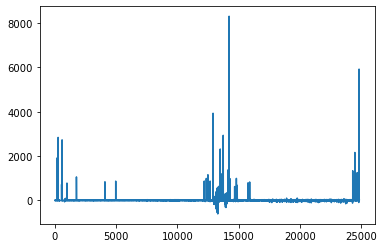

In [7]:
data_df['t0'].diff().plot()

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

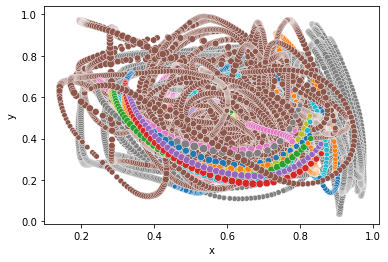

In [8]:
sns.scatterplot(data=data_df, x='x', y='y', size='p', hue='stroke_id', palette='tab10', legend=False)

<AxesSubplot:>

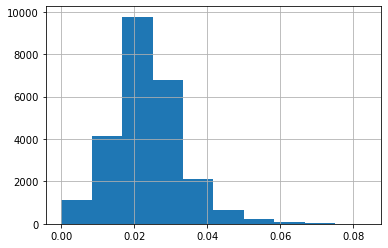

In [9]:
data_df['p'].hist()

## map between stroke and segment ids

In [10]:
tmp = data_df.groupby('stroke_id').apply(lambda x: list(set(x['segment_id'])))

In [11]:
tmp.head(2)

stroke_id
19                           [0, 1, 2, 3, 4, 5, 6]
20    [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
dtype: object

In [12]:
stroke_segment_map = {}
segment_stroke_map = {}
for i, row in tmp.iteritems():
    stroke_segment_map[i] = row
    for segment in row:
        segment_stroke_map[segment] = i

## features

<AxesSubplot:>

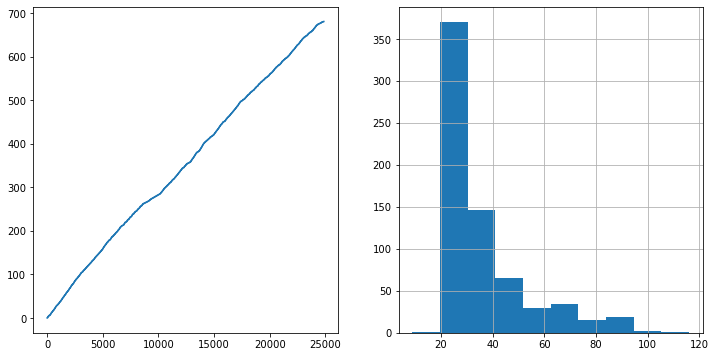

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
data_df['segment_id'].plot(ax=ax[0])
data_df.groupby('segment_id').size().hist(ax=ax[1])

The scale of the different features should be comparable for the DTW to take them into account equally. Alternatively, we could compute a Mahalanobis distance from a small batch of data.

<AxesSubplot:>

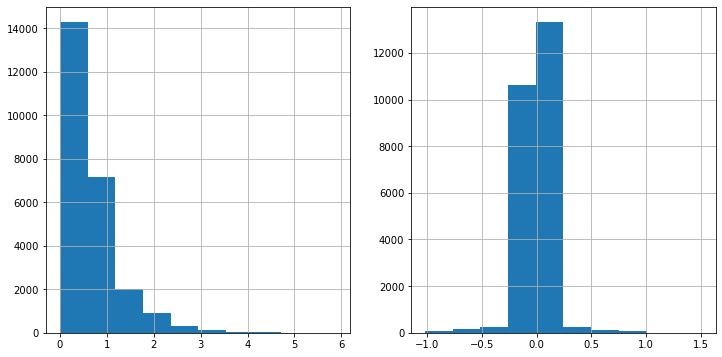

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
data_df['s'].hist(ax=ax[0])
data_df['da'].hist(ax=ax[1])

## one stroke

In [15]:
stroke_i = select(data_df, stroke_id=33)

In [16]:
stroke_i.head()

,key,t0,t0_norm,ts,stroke_id,segment_id,x,y,p,x_,...,p_,x0,y0,p0,x1,y1,p1,s,angle,da
13568,573363_50,573363,0.504705,50,33,382,0.589794,0.239986,0.018724,0.003753,...,0.005883,0.000025,-0.000031,0.000193,0.000012,-0.000015,0.000068,0.001951,-0.894583,0.0
13569,573363_60,573363,0.504705,60,33,382,0.591283,0.237732,0.019205,0.005243,...,0.006364,0.000096,-0.000120,0.000486,0.000037,-0.000047,0.000150,0.006017,-0.902728,0.0
13570,573376_70,573376,0.504749,70,33,382,0.592917,0.235408,0.019379,0.006877,...,0.006538,0.000276,-0.000351,0.001022,0.000092,-0.000118,0.000285,0.014967,-0.911078,0.0
13571,573389_80,573389,0.504793,80,33,382,0.594487,0.233166,0.019921,0.008446,...,0.007080,0.000642,-0.000832,0.001847,0.000190,-0.000250,0.000469,0.031407,-0.919359,0.0
13572,573402_90,573402,0.504837,90,33,382,0.596060,0.230903,0.020253,0.010020,...,0.007413,0.001269,-0.001674,0.002928,0.000344,-0.000459,0.000682,0.057328,-0.927348,0.0


<AxesSubplot:xlabel='ts', ylabel='s'>

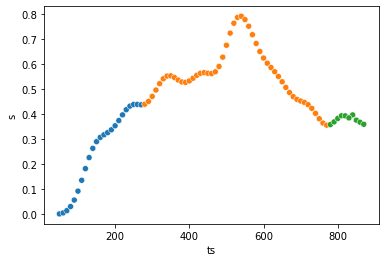

In [17]:
sns.scatterplot(data=stroke_i, x='ts', y='s', hue='segment_id', palette='tab10', legend=False)

## check closest neighbours

This has been removed temporarily.

In [81]:
# min_dtw_id = feat_df.groupby('segment_id').first()['min_dtw_id'].values
# min_dtw = feat_df.groupby('segment_id').first()['min_dtw'].values

# plt.plot(min_dtw_id)

# plt.hist(min_dtw, range=(0, 30))

## check data processing

The angle provided by arctan2 is succeptible to wrap around. This can be accomodated with np.unwrap. However, it is currently not implemented in the js code.

In [82]:
# filename = "../data/user/data_25042022_170416.csv"

In [83]:
gi = data_df.groupby('segment_id').get_group(33)

<AxesSubplot:>

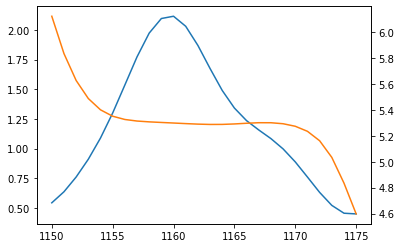

In [84]:
fig, ax = plt.subplots()
gi['s'].plot(ax=ax)
axt = ax.twinx()
gi['angle'].plot(ax=axt, c=tab10[1])

In [55]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [56]:
alpha = np.arctan2(gi['y1'], gi['x1'])
da = scsig.savgol_filter(alpha, deriv=1, **savgol_dict)

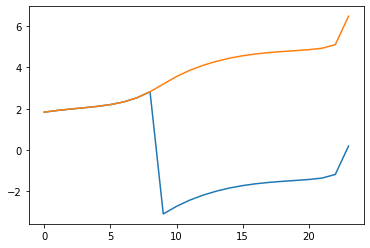

In [57]:
plt.plot(alpha.values)
plt.plot(np.unwrap(alpha))

In [58]:
alpha = alpha.values

The angle computed from atan2 is prone to phase wrapping. The function below is meant to emulate the behaviour of np.unwrap in a stream manner.
This is implemented in the MAX/MSP app in javascript.

In [59]:
def unwrap(x_arr):
    global last, acc
    last = 0
    acc = 0
    def unwrap_(x, period=np.pi):
        global last, acc
        # print(x, last, acc)
        diff = x+acc - last
        if np.abs(diff) > period:
            if diff < 0:
                acc += 2*period
            if diff > 0:
                acc -= 2*period
        x += acc
        last = x

        return x
    res = []
    for x in x_arr:
        res.append(unwrap_(x))
    
    return np.array(res)

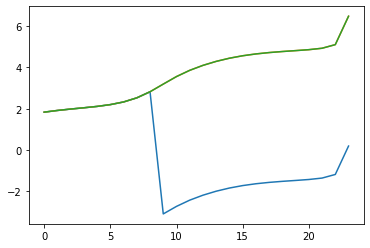

In [60]:
plt.plot(alpha)
plt.plot(np.unwrap(alpha))
plt.plot(unwrap(alpha))